### Visualizations for CIFAR-10 Dataset
- Class Distributions
- Sample Images


In [2]:
from data_loader import load_training, load_meta, load_testing
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tr_data, tr_labels = load_training()
te_data, te_labels = load_testing()
tr_labels = np.array(tr_labels)
te_labels = np.array(te_labels)


labels = load_meta()

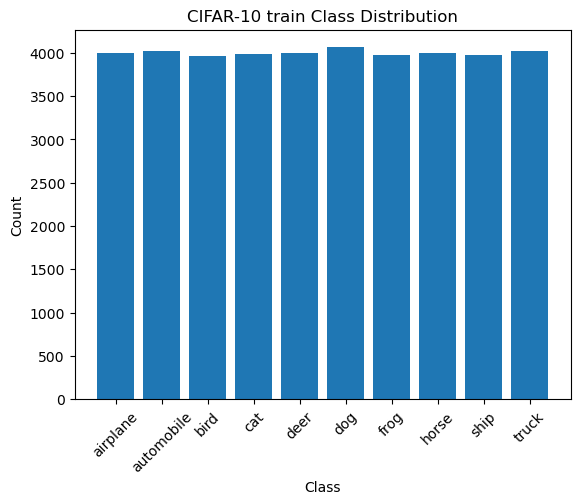

In [4]:
class_counts = np.bincount(tr_labels)

# Generate x-axis labels using class names
x_labels = [labels[i] for i in range(len(class_counts))]

fig, ax1 = plt.subplots()

# Create a bar plot for class distributions
ax1.bar(x_labels, class_counts)

# Set plot title and labels
ax1.set_title('CIFAR-10 train Class Distribution')
ax1.set_ylabel('Count')
ax1.set_xlabel('Class')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


As shown in the figure above the classes are evenly distributed with no single class having a vastly larger amount of data.

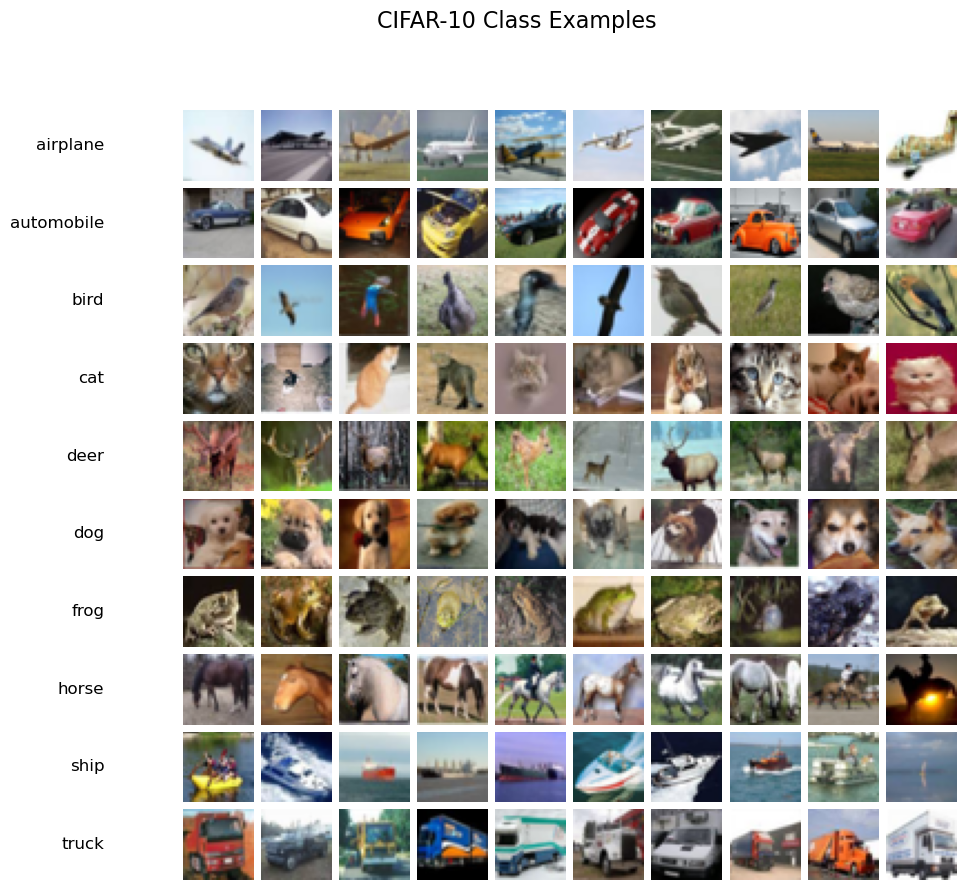

In [4]:
# Set the number of images to display per class
num_images_per_class = 10

# Create a figure with a 10x10 grid of subplots
fig, axes = plt.subplots(10, 11, figsize=(11, 10))
fig.suptitle('CIFAR-10 Class Examples', fontsize=16)

# Iterate over each class
for class_id in range(len(labels)):
    # Filter the images and labels for the current class
    class_images = tr_data[tr_labels == class_id][:num_images_per_class]

    axes[class_id, 0].text(0, 0.5, labels[class_id], fontsize=12, ha='right', va='center')
    axes[class_id, 0].axis('off')

    # Iterate over each image in the class
    for i, image in enumerate(class_images):
        # Reshape the image to the original 32x32 shape if needed
        image = image.reshape(3,32,32)
        image = image.transpose((1, 2, 0))

        # Plot the image on the corresponding subplot
        ax = axes[class_id, i+1]
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(image)
        ax.axis('off')

plt.subplots_adjust(hspace=0.1, wspace=0.1)

# Adjust the spacing between subplots

# Display the plot
plt.show()

Images showing averages over each class for each dimension

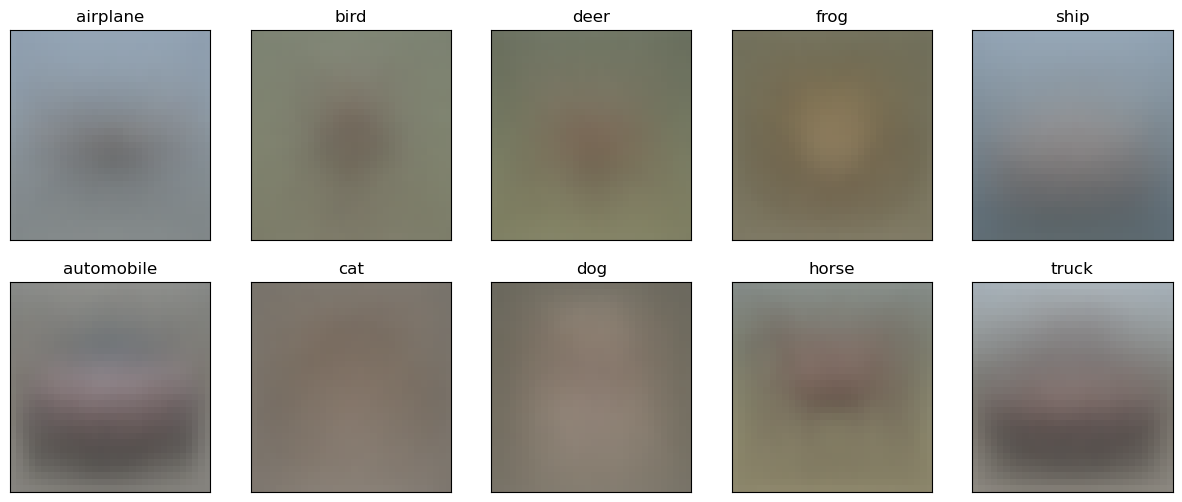

In [26]:
fig, axes = plt.subplots(2,5, figsize=(15,6))

for class_id in range(len(labels)):
    img = np.mean(tr_data[tr_labels == class_id], axis=0, dtype=int)
    img = img.reshape(3,32,32)
    img = img.transpose((1, 2, 0))
    ax = axes[class_id%2, class_id//2]
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('tight')
    ax.set_title(labels[class_id])


plt.show()